# Data Preprocessing


In [1]:
import re
import string
import json
import nltk
import glob
import numpy as np
from nltk.corpus import stopwords
from nltk import ngrams
from nltk import ToktokTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import wordnet
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nltk.download('stopwords') # downloads stopword
nltk.download('wordnet') # downloads wordnet
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
lemmatizer = WordNetLemmatizer()
tokenizer = ToktokTokenizer()
vectorizer = TfidfVectorizer()

# loads english stopwords
stopword_list = nltk.corpus.stopwords.words('english')

### Module definition


In [4]:
def remove_punctuations(text):
    """Removes punctuation from text"""
    text = text.strip()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'[^\w\s]', '', text)
    return text


def generate_tokens(text):
    """Generates tokens using tokenizer"""
    text = text.lower()
    tokens = tokenizer.tokenize(text)
    texts = [word for word in tokens if word not in stopword_list]
    # texts = ' '.join(texts)
    return texts


def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


def capture_lemmatization(tokens):
    """Captures lemmatization and translates word accordingly"""
    tokens = [lemmatizer.lemmatize(
        token, get_wordnet_pos(token)) for token in tokens]
    return tokens


def decontact(phrase):
    """Removes apostrophe word and numbers"""
    # number
    phrase = re.sub(r'\b\d+\b', '', phrase)

    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


def load_articles():
    """Load multiple articles from various sources"""
    articles = []
    for filename in glob.glob('./articles/*.json'):
        try:
            with open(filename,encoding='utf-8') as f:
                data = json.load(f) 
                articles += data
        except json.decoder.JSONDecodeError as e:
                data = []

    return articles


__Load articles__

In [ ]:
articles = load_articles()
print('Total documents loaded:',len(articles))

In [6]:
# f = open('./articles/ndtv.json', encoding="utf-8")
# articles = json.load(f)
# f.close()

article_contents = []
for article in articles:
    article_contents.append(' '.join(article['content']))
print('Content in an article', article_contents[0], end='\n')


Content in an article Investors and depositors tried to pull $42 billion from Silicon Valley Bank on Thursday in one of the biggest US bank runs in more than a decade, according to a Friday regulatory filing. At the close of business on March 9, the bank had a negative cash balance of $958 million, according to an order taking possession of the bank filed Friday by California's bank regulator, the Department of Financial Protection and Innovation. The order shines light on the scale of the bank run faced by the lender, which was placed into Federal Deposit Insurance Corp. receivership by the state regulator. The scale of attempted withdrawals was so large that the bank ran out of cash and ways to get it. When the Federal Reserve sent its cash letter - a list of checks and other transactions for the bank to process - to SVB, it failed to pull together enough currency to meet it, according to the California regulator. "Despite attempts from the bank, with the assistance of regulators, to

In [7]:

res = []
for content in article_contents:
    res.append(remove_punctuations(content))

article_contents = res
print('After removal of punctuations', article_contents[0], end='\n')


After removal of punctuations Investors and depositors tried to pull 42 billion from Silicon Valley Bank on Thursday in one of the biggest US bank runs in more than a decade according to a Friday regulatory filing At the close of business on March 9 the bank had a negative cash balance of 958 million according to an order taking possession of the bank filed Friday by Californias bank regulator the Department of Financial Protection and Innovation The order shines light on the scale of the bank run faced by the lender which was placed into Federal Deposit Insurance Corp receivership by the state regulator The scale of attempted withdrawals was so large that the bank ran out of cash and ways to get it When the Federal Reserve sent its cash letter  a list of checks and other transactions for the bank to process  to SVB it failed to pull together enough currency to meet it according to the California regulator Despite attempts from the bank with the assistance of regulators to transfer col

In [9]:

res = []
for content in article_contents:
    res.append(decontact(content))
    
article_contents = res
print('After removal of apostropes and numbers', article_contents[0], end='\n')

After removal of apostropes and numbers Investors and depositors tried to pull  billion from Silicon Valley Bank on Thursday in one of the biggest US bank runs in more than a decade according to a Friday regulatory filing At the close of business on March  the bank had a negative cash balance of  million according to an order taking possession of the bank filed Friday by Californias bank regulator the Department of Financial Protection and Innovation The order shines light on the scale of the bank run faced by the lender which was placed into Federal Deposit Insurance Corp receivership by the state regulator The scale of attempted withdrawals was so large that the bank ran out of cash and ways to get it When the Federal Reserve sent its cash letter  a list of checks and other transactions for the bank to process  to SVB it failed to pull together enough currency to meet it according to the California regulator Despite attempts from the bank with the assistance of regulators to transfer

In [10]:

article_tokens = []
for content in article_contents:
    article_tokens.append(generate_tokens(content))

print('Generation of tokens', article_tokens[0], end='\n')


Generation of tokens ['investors', 'depositors', 'tried', 'pull', 'billion', 'silicon', 'valley', 'bank', 'thursday', 'one', 'biggest', 'us', 'bank', 'runs', 'decade', 'according', 'friday', 'regulatory', 'filing', 'close', 'business', 'march', 'bank', 'negative', 'cash', 'balance', 'million', 'according', 'order', 'taking', 'possession', 'bank', 'filed', 'friday', 'californias', 'bank', 'regulator', 'department', 'financial', 'protection', 'innovation', 'order', 'shines', 'light', 'scale', 'bank', 'run', 'faced', 'lender', 'placed', 'federal', 'deposit', 'insurance', 'corp', 'receivership', 'state', 'regulator', 'scale', 'attempted', 'withdrawals', 'large', 'bank', 'ran', 'cash', 'ways', 'get', 'federal', 'reserve', 'sent', 'cash', 'letter', 'list', 'checks', 'transactions', 'bank', 'process', 'svb', 'failed', 'pull', 'together', 'enough', 'currency', 'meet', 'according', 'california', 'regulator', 'despite', 'attempts', 'bank', 'assistance', 'regulators', 'transfer', 'collateral', 'v

In [11]:

res = []
i = 1
for tokens in article_tokens:
    res.append(capture_lemmatization(tokens))
    # print(i,"/", 5006)
    i += 1
article_tokens = res

print('After lemmatization', article_tokens[0], end='\n')


1 / 5006
2 / 5006
3 / 5006
4 / 5006
5 / 5006
6 / 5006
7 / 5006
8 / 5006
9 / 5006
10 / 5006
11 / 5006
12 / 5006
13 / 5006
14 / 5006
15 / 5006
16 / 5006
17 / 5006
18 / 5006
19 / 5006
20 / 5006
21 / 5006
22 / 5006
23 / 5006
24 / 5006
25 / 5006
26 / 5006
27 / 5006
28 / 5006
29 / 5006
30 / 5006
31 / 5006
32 / 5006
33 / 5006
34 / 5006
35 / 5006
36 / 5006
37 / 5006
38 / 5006
39 / 5006
40 / 5006
41 / 5006
42 / 5006
43 / 5006
44 / 5006
45 / 5006
46 / 5006
47 / 5006
48 / 5006
49 / 5006
50 / 5006
51 / 5006
52 / 5006
53 / 5006
54 / 5006
55 / 5006
56 / 5006
57 / 5006
58 / 5006
59 / 5006
60 / 5006
61 / 5006
62 / 5006
63 / 5006
64 / 5006
65 / 5006
66 / 5006
67 / 5006
68 / 5006
69 / 5006
70 / 5006
71 / 5006
72 / 5006
73 / 5006
74 / 5006
75 / 5006
76 / 5006
77 / 5006
78 / 5006
79 / 5006
80 / 5006
81 / 5006
82 / 5006
83 / 5006
84 / 5006
85 / 5006
86 / 5006
87 / 5006
88 / 5006
89 / 5006
90 / 5006
91 / 5006
92 / 5006
93 / 5006
94 / 5006
95 / 5006
96 / 5006
97 / 5006
98 / 5006
99 / 5006
100 / 5006
101 / 50

In [12]:

article_vec = list()
for tokens in article_tokens:
    modified_text = ' '.join(tokens)
    article_vec.append(modified_text)


# Unigram

In [13]:

vectorizer.fit(article_vec)
tfidf_matrix = vectorizer.transform(article_vec)

print(vectorizer.vocabulary_)


{'investor': 3760, 'depositor': 2020, 'try': 7478, 'pull': 5761, 'billion': 893, 'silicon': 6611, 'valley': 7724, 'bank': 761, 'thursday': 7309, 'one': 5080, 'big': 887, 'run': 6273, 'decade': 1920, 'accord': 160, 'friday': 2968, 'regulatory': 6019, 'filing': 2810, 'close': 1407, 'business': 1094, 'march': 4422, 'negative': 4867, 'cash': 1182, 'balance': 738, 'million': 4586, 'order': 5134, 'take': 7145, 'possession': 5518, 'file': 2809, 'california': 1121, 'regulator': 6018, 'department': 2011, 'financial': 2824, 'protection': 5724, 'innovation': 3661, 'shine': 6545, 'light': 4213, 'scale': 6370, 'face': 2702, 'lender': 4166, 'place': 5429, 'federal': 2775, 'deposit': 2019, 'insurance': 3697, 'corp': 1711, 'receivership': 5940, 'state': 6886, 'attempt': 649, 'withdrawal': 7992, 'large': 4099, 'ran': 5867, 'way': 7910, 'get': 3081, 'reserve': 6118, 'sent': 6471, 'letter': 4182, 'list': 4238, 'check': 1297, 'transaction': 7410, 'process': 5659, 'svb': 7091, 'fail': 2717, 'together': 734

In [14]:
tfidf_matrix.shape

(191, 8111)

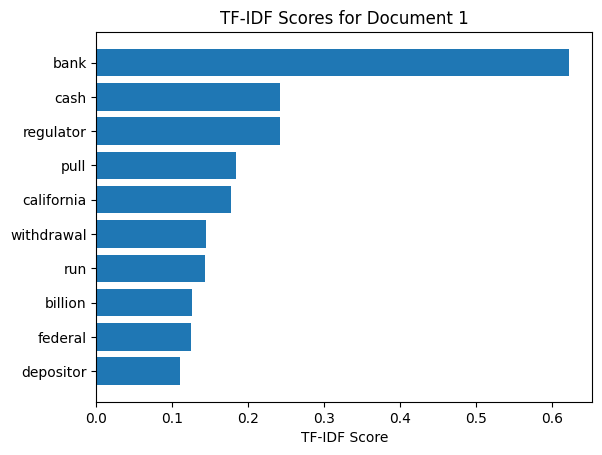

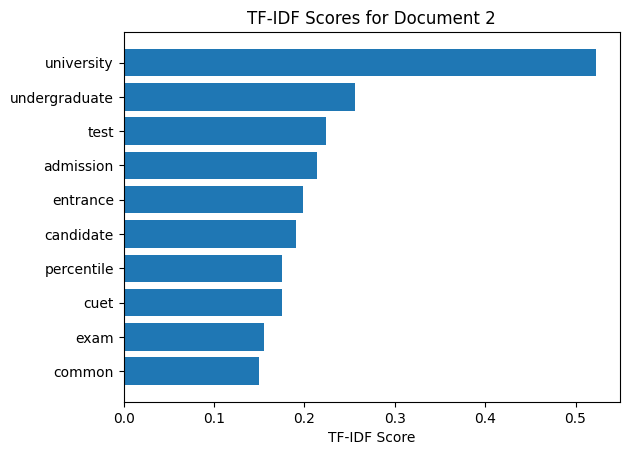

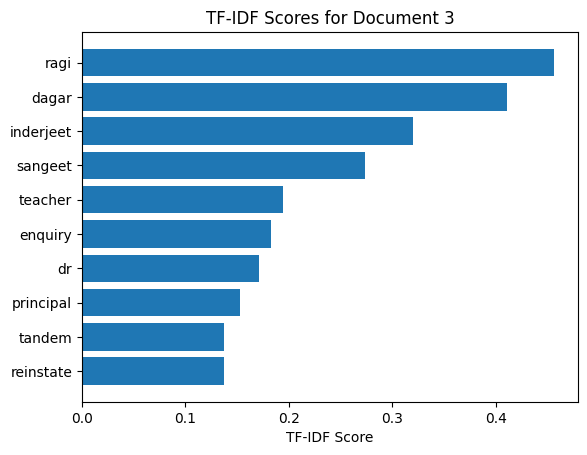

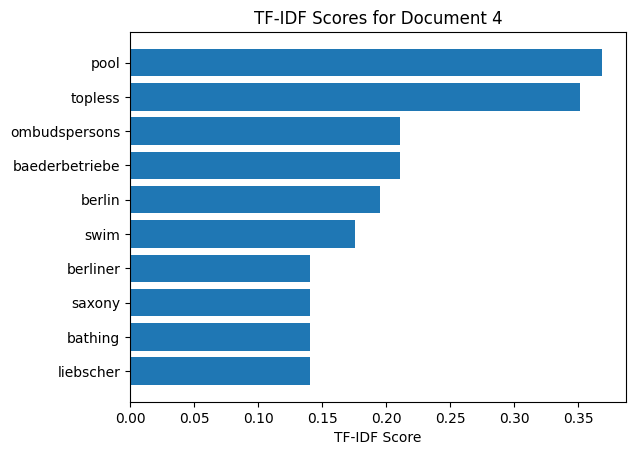

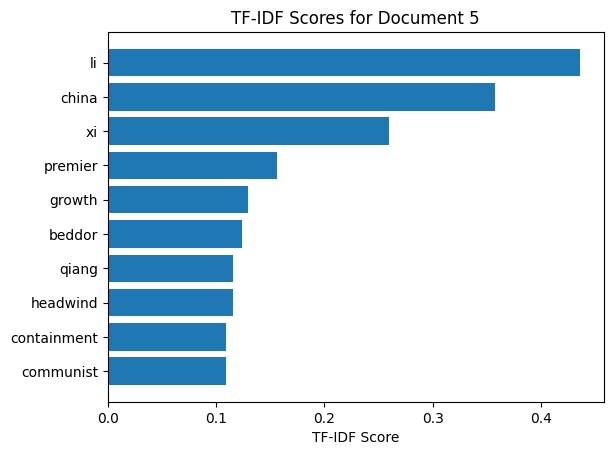

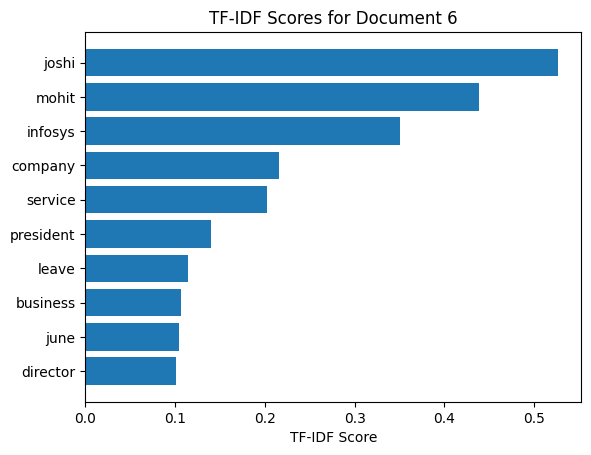

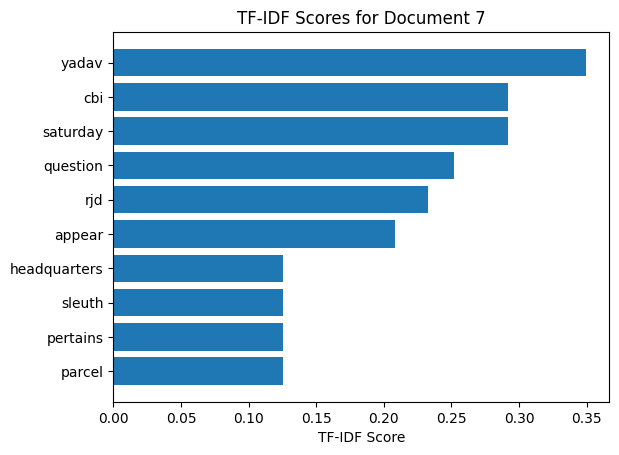

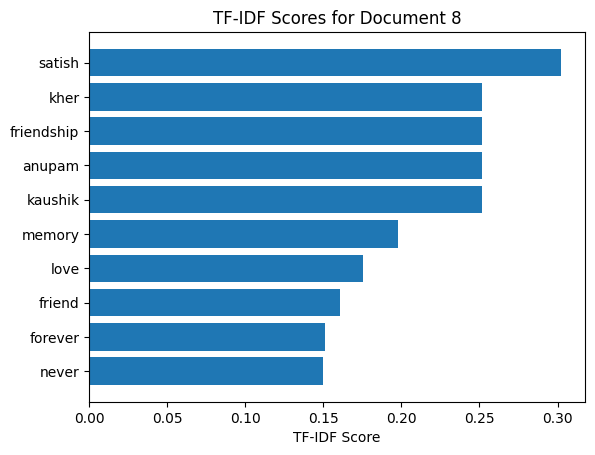

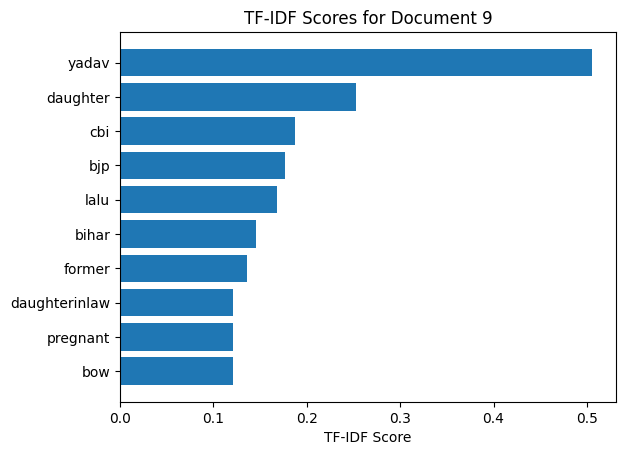

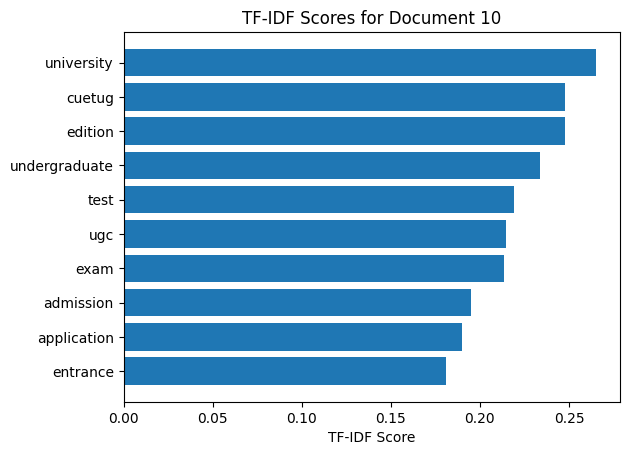

In [16]:
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()

# Define the number of top features to display in the bar chart
n = 10

# Loop over each document and create a bar chart of the top n TF-IDF scores
for i, doc in enumerate(article_vec):
    # Get the indices of the top n TF-IDF scores for the current document
    if i == 10: break
    top_indices = np.argsort(tfidf_scores[i])[-n:]

    # Get the top n feature names and TF-IDF scores for the current document
    top_features = [feature_names[j] for j in top_indices]
    top_scores = [tfidf_scores[i][j] for j in top_indices]

    # Create a horizontal bar chart of the top n TF-IDF scores
    fig, ax = plt.subplots()
    ax.barh(top_features, top_scores)
    ax.set_title("TF-IDF Scores for Document {}".format(i+1))
    ax.set_xlabel("TF-IDF Score")
    plt.show()


# Bigram

In [17]:

vectorizer = TfidfVectorizer(ngram_range=(2,2))
vectorizer.fit(article_vec)
tfidf_matrix = vectorizer.transform(article_vec)

print(vectorizer.vocabulary_)


{'investor depositor': 15891, 'depositor try': 8558, 'try pull': 32780, 'pull billion': 24948, 'billion silicon': 3646, 'silicon valley': 28962, 'valley bank': 33745, 'bank thursday': 3174, 'thursday one': 32044, 'one big': 21621, 'big bank': 3574, 'bank run': 3166, 'run decade': 26962, 'decade accord': 8131, 'accord friday': 277, 'friday regulatory': 12582, 'regulatory filing': 25901, 'filing close': 11770, 'close business': 5785, 'business march': 4247, 'march bank': 18625, 'bank negative': 3153, 'negative cash': 20708, 'cash balance': 4746, 'balance million': 3057, 'million accord': 19391, 'accord order': 293, 'order take': 22030, 'take possession': 31260, 'possession bank': 23839, 'bank file': 3138, 'file friday': 11764, 'friday california': 12565, 'california bank': 4312, 'bank regulator': 3162, 'regulator department': 25890, 'department financial': 8513, 'financial protection': 11851, 'protection innovation': 24763, 'innovation order': 15538, 'order shine': 22026, 'shine light': 

In [18]:
tfidf_matrix.shape

(191, 35543)

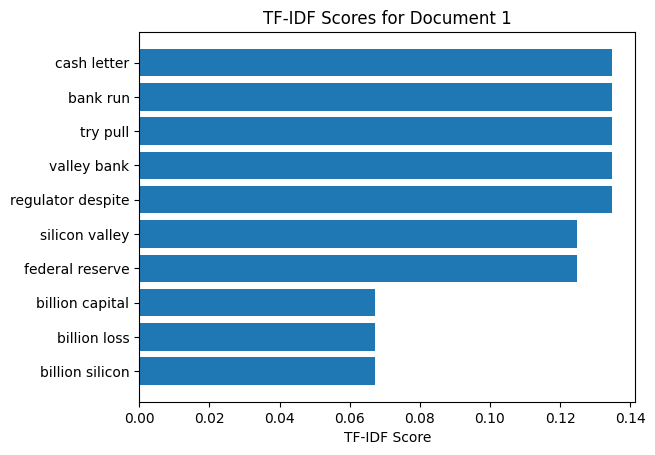

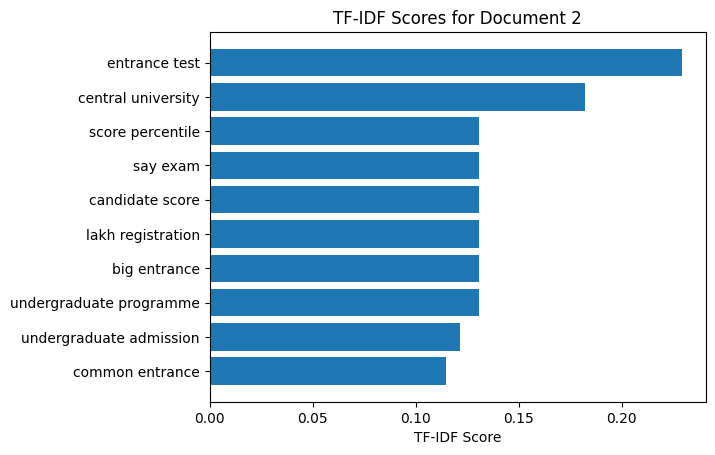

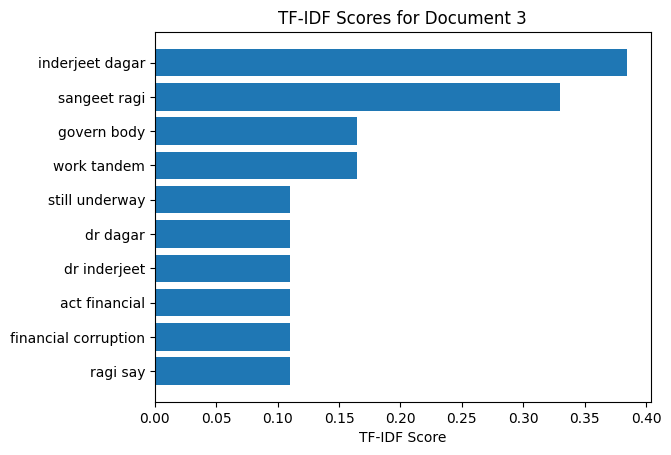

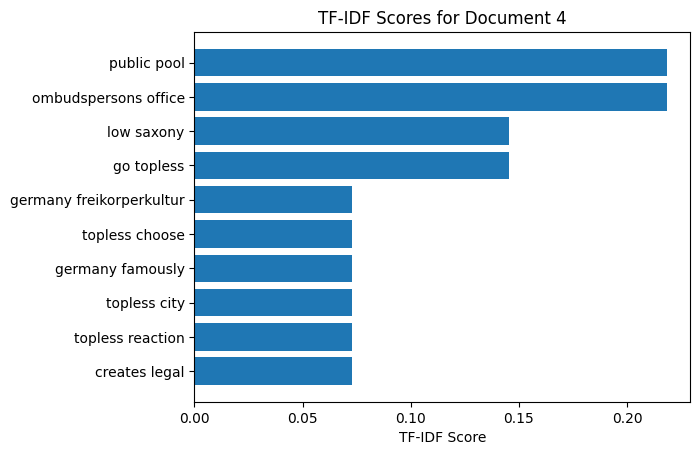

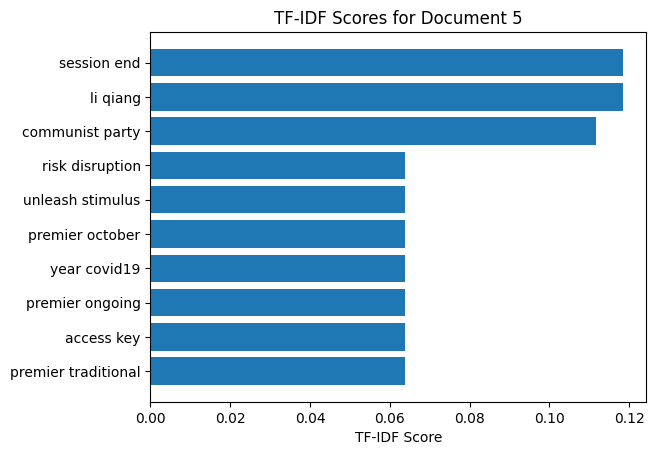

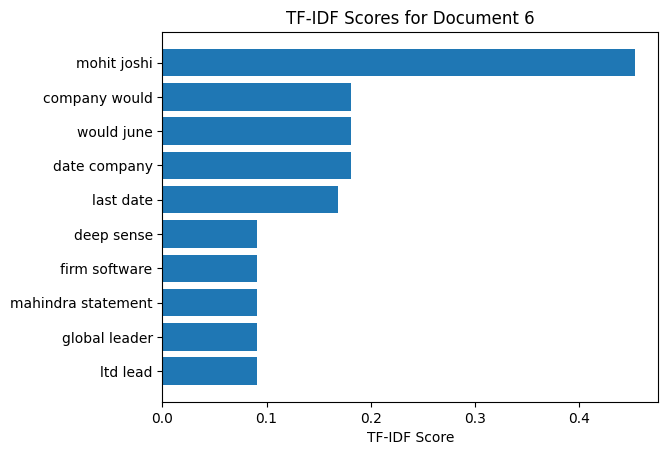

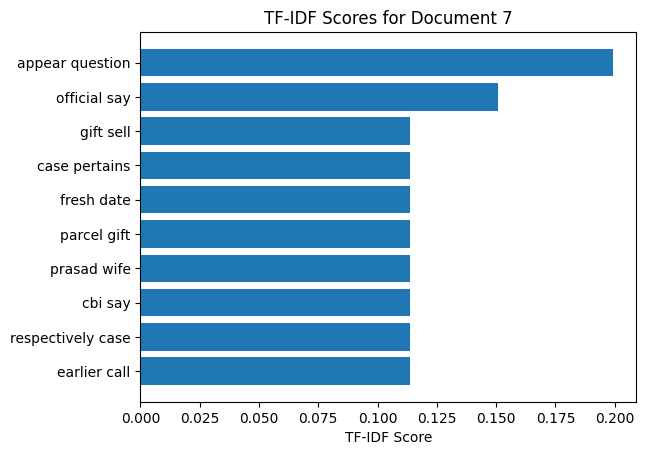

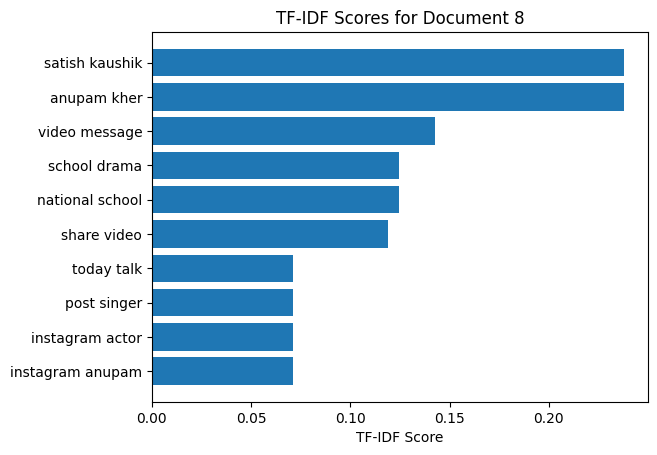

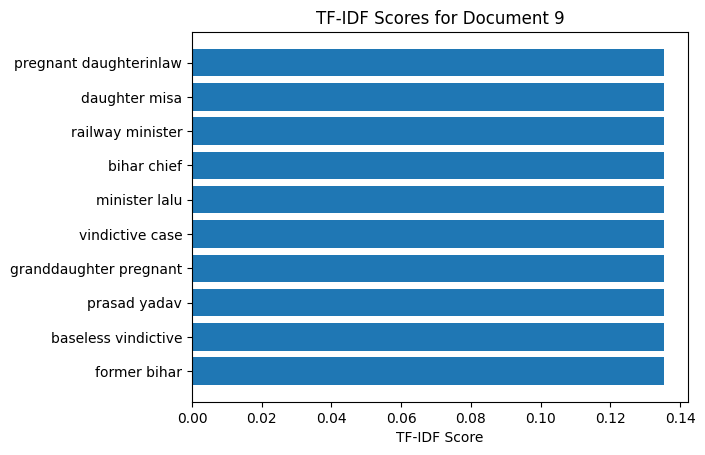

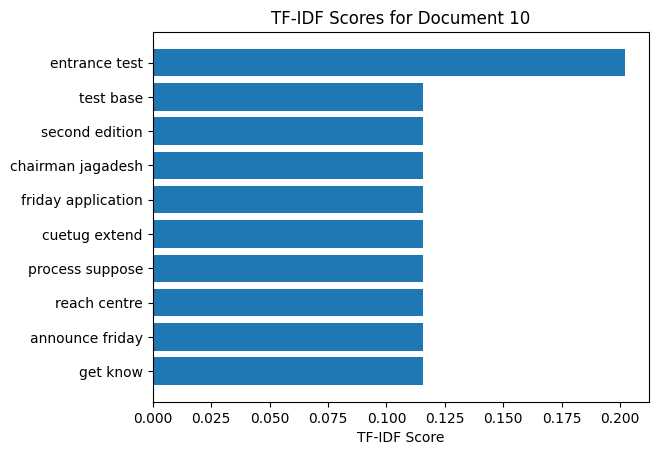

In [20]:
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()

# Define the number of top features to display in the bar chart
n = 10

# Loop over each document and create a bar chart of the top n TF-IDF scores
for i, doc in enumerate(article_vec):
    # Get the indices of the top n TF-IDF scores for the current document
    if i == 10: break
    top_indices = np.argsort(tfidf_scores[i])[-n:]

    # Get the top n feature names and TF-IDF scores for the current document
    top_features = [feature_names[j] for j in top_indices]
    top_scores = [tfidf_scores[i][j] for j in top_indices]

    # Create a horizontal bar chart of the top n TF-IDF scores
    fig, ax = plt.subplots()
    ax.barh(top_features, top_scores)
    ax.set_title("TF-IDF Scores for Document {}".format(i+1))
    ax.set_xlabel("TF-IDF Score")
    plt.show()